In [1]:
#-*- coding:utf-8 -*-
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns

In [2]:
movies = pd.read_csv('C:/Users/hjkim/2019-1/machine_learning/homework1/2017_movie_top300.csv', encoding = 'EUC-KR')
movies.head(6)


,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,대표국적,국적,배급사
0,1,택시운전사,2017-08-02,"95,853,645,649",5.5%,"12,186,327","1,906",한국,한국,(주)쇼박스
1,2,신과함께-죄와 벌,2017-12-20,"68,350,496,432",3.9%,"8,539,495","1,912",한국,한국,롯데쇼핑㈜롯데엔터테인먼트
2,3,공조,2017-01-18,"63,781,731,326",3.7%,"7,817,446",976,한국,한국,씨제이이앤엠(주)
3,4,스파이더맨: 홈 커밍,2017-07-05,"59,125,813,820",3.4%,"7,258,678","1,965",미국,미국,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점
4,5,범죄도시,2017-10-03,"56,318,014,149",3.2%,"6,879,841","1,315",한국,한국,"메가박스중앙(주)플러스엠,(주)키위미디어그룹"
5,6,군함도,2017-07-26,"50,510,565,168",2.9%,"6,592,151","2,027",한국,한국,씨제이이앤엠(주)


In [3]:
movies.isnull().sum()
#결측치 없음

순위         0
영화명        0
개봉일        0
매출액        0
매출액 점유율    0
관객수        0
스크린수       0
대표국적       0
국적         0
배급사        0
dtype: int64

In [4]:
NAVER_URL = 'https://openapi.naver.com/v1/search/movie.json'
NAVER_CLIENT_ID = 'Hd43qOyUJsKaRzxCzf4H'
NAVER_CLIENT_SECRET = 'I7IyS_QghX'

In [5]:
jemok = movies['영화명']
jemok[7]

'더 킹'

In [6]:
user_ratings= []
special_ratings = []
videos = []
genres = []
deung_geups = []
running_times = []

In [7]:
for i in range(300):

        q = str(jemok[i])
        open_date = movies['개봉일'][i]
        params = {'query': q, 'yearfrom':2000, 'yearto':2018, 'display': 100}
        r = requests.get(NAVER_URL, headers={
                'X-Naver-Client-Id': NAVER_CLIENT_ID,
                'X-Naver-Client-Secret': NAVER_CLIENT_SECRET
            }, params=params)
        r.text
        movie_info = json.loads(r.text)
        url = ''
        a = 0
        source_code = ''
        plain_text = ''
        #개봉일자를 사용해서 정확한 날짜를 판별
        for j in range(len(movie_info['items'])):
            a = j
            url = movie_info['items'][j]['link']#영화 자체의 url로 이동  
            source_code = requests.get(url)
            plain_text = source_code.text
            soup = BeautifulSoup(plain_text, 'lxml')
            try:
                naver_open_date = soup.find_all('dd')[2].find_all('span')[3].find_all('a')[-2].text.strip() + soup.find_all('dd')[2].find_all('span')[3].find_all('a')[-1].text.strip().replace('.','-')
            except:
                continue
            try:
                if open_date == naver_open_date:
                    break
                else:
                    continue
            except:
                continue

        try:
            user_ratings.append(movie_info['items'][a]['userRating'])    
        except:
            user_ratings.append(np.nan)
            special_ratings.append(np.nan)
            videos.append(np.nan)
            genres.append(np.nan)
            deung_geups.append(np.nan)
            running_times.append(np.nan)
            print()
            print(q, '검색 오류')
            continue
        #전문가 평점

        try:
            scorearea = soup.find_all('div', "spc_score_area")
            newsoup = BeautifulSoup(str(scorearea), 'lxml')
            score = newsoup.find_all('em')
            
            scoreis = score[1].text + score[2].text + score[3].text + score[4].text
            special_ratings.append(scoreis)
        except:
            special_ratings.append(np.nan)
            print()
            print(q, '전문가 평점 수집 오류')
            pass
        
          #동영상 수
        try:
            video = soup.find_all('span', {"class": "pg_cnt"})[1]
            videos.append(video.find('em').text)
        except:
            video = soup.find_all('span', {"class": "pg_cnt"})[0]
            videos.append(video.find('em').text)
          #장르
        try:
            genre = soup.find_all('dd')[2].find('span').find_all('a')[0].text
            genres.append(genre)
        except:
            genres.append(np.nan)
            print()
            print(q, '장르 수집 오류')
            
        #등급
        try:
            DG = soup.find_all('dd')[5].find('a').text
            deung_geups.append(DG)
        except:
            print()
            deung_geups.append(np.nan)
            print(q, '등급 수집 오류')
            
          #상영시간
        try:
            RT = soup.find_all('dd')[2].find_all('span')[2].text
            running_times.append(RT)
        except:
            print()
            running_times.append(np.nan)
            print(q, '상영 시간 수집 오류')
        print(i + 1,q, '영화 수집 완료')

1 택시운전사 영화 수집 완료
2 신과함께-죄와 벌 영화 수집 완료
3 공조 영화 수집 완료
4 스파이더맨: 홈 커밍 영화 수집 완료
5 범죄도시 영화 수집 완료
6 군함도 영화 수집 완료
7 청년경찰 영화 수집 완료
8 더 킹 영화 수집 완료
9 미녀와 야수 영화 수집 완료
10 킹스맨: 골든 서클 영화 수집 완료
11 토르: 라그나로크 영화 수집 완료
12 꾼 영화 수집 완료
13 강철비 영화 수집 완료
14 남한산성 영화 수집 완료
15 미이라 영화 수집 완료
16 분노의 질주: 더 익스트림 영화 수집 완료
17 너의 이름은. 영화 수집 완료
18 슈퍼배드 3 영화 수집 완료
19 아이 캔 스피크 영화 수집 완료
20 캐리비안의 해적: 죽은 자는 말이 없다 영화 수집 완료
21 프리즌 영화 수집 완료
22 덩케르크 영화 수집 완료
23 가디언즈 오브 갤럭시 VOL. 2 영화 수집 완료
24 살인자의 기억법 영화 수집 완료
25 트랜스포머: 최후의 기사 영화 수집 완료
26 보안관 영화 수집 완료
27 조작된 도시 영화 수집 완료
28 보스 베이비 영화 수집 완료
29 재심 영화 수집 완료
30 박열 영화 수집 완료
31 모아나 영화 수집 완료
32 마스터 영화 수집 완료
33 로건 영화 수집 완료
34 원더 우먼 영화 수집 완료
35 겟 아웃 영화 수집 완료
36 혹성탈출: 종의 전쟁 영화 수집 완료
37 1987 영화 수집 완료
38 애나벨 : 인형의 주인 영화 수집 완료
39 노무현입니다 영화 수집 완료
40 저스티스 리그 영화 수집 완료
41 킬러의 보디가드 영화 수집 완료
42 콩: 스컬 아일랜드 영화 수집 완료
43 23 아이덴티티 영화 수집 완료
44 임금님의 사건수첩 영화 수집 완료
45 부라더 영화 수집 완료
46 기억의 밤 영화 수집 완료

해피 데스데이 전문가 평점 수집 오류
47 해피 데스데이 영화 수집 완료
48 브이아이피 영화 수집 완료
49 특별시민 영화 수집 완료
50 에이리언: 커버넌트 영화 수집 완료
51 장산범 영화 수집 

287 길 영화 수집 완료
288 여배우는 오늘도 영화 수집 완료

매직키드 보보 전문가 평점 수집 오류

매직키드 보보 장르 수집 오류

매직키드 보보 상영 시간 수집 오류
289 매직키드 보보 영화 수집 완료
290 7년-그들이 없는 언론 영화 수집 완료

하이큐!! 승자와 패자 전문가 평점 수집 오류
291 하이큐!! 승자와 패자 영화 수집 완료
292 빅 배드 폭스 영화 수집 완료

링스 전문가 평점 수집 오류
293 링스 영화 수집 완료
294 스파이 게임 영화 수집 완료
295 십계: 구원의 길 영화 수집 완료

호비와 무지개 오아시스 대모험 전문가 평점 수집 오류

호비와 무지개 오아시스 대모험 장르 수집 오류

호비와 무지개 오아시스 대모험 상영 시간 수집 오류
296 호비와 무지개 오아시스 대모험 영화 수집 완료
297 로즈 영화 수집 완료
298 콜로설 영화 수집 완료
299 귀향, 끝나지 않은 이야기 영화 수집 완료
300 개구리왕국 2 영화 수집 완료


In [8]:
print(len(user_ratings))
print(len(special_ratings))
print(len(videos))
print(len(genres))
print(len(deung_geups))
print(len(running_times))


300
300
300
300
300
300


In [60]:
df_list = [user_ratings,special_ratings ,videos ,genres ,deung_geups ,running_times]

In [61]:
df = pd.DataFrame(df_list)
df = df.T
df['영화명'] = movies['영화명']
df.head()

,0,1,2,3,4,5,영화명
0,9.04,6.09,20,드라마,15세 관람가,137분,택시운전사
1,7.83,5.92,17,판타지,12세 관람가,139분,신과함께-죄와 벌
2,8.27,5.00,17,액션,15세 관람가,125분,공조
3,8.37,7.00,8,액션,12세 관람가,133분,스파이더맨: 홈 커밍
4,9.14,6.00,14,액션,청소년 관람불가,121분,범죄도시


In [62]:
df.columns = ['관객 평점', '전문가 평점', '동영상', '장르', '등급', '상영 시간', '영화명']
column_list = ['영화명','관객 평점', '전문가 평점', '동영상', '장르', '등급', '상영 시간']
df = df[column_list]
df['제작 국가'] = movies['대표국적']
df['개봉일'] = movies['개봉일']
df['관객수'] = movies['관객수']
df.head()

,영화명,관객 평점,전문가 평점,동영상,장르,등급,상영 시간,제작 국가,개봉일,관객수
0,택시운전사,9.04,6.09,20,드라마,15세 관람가,137분,한국,2017-08-02,"12,186,327"
1,신과함께-죄와 벌,7.83,5.92,17,판타지,12세 관람가,139분,한국,2017-12-20,"8,539,495"
2,공조,8.27,5.00,17,액션,15세 관람가,125분,한국,2017-01-18,"7,817,446"
3,스파이더맨: 홈 커밍,8.37,7.00,8,액션,12세 관람가,133분,미국,2017-07-05,"7,258,678"
4,범죄도시,9.14,6.00,14,액션,청소년 관람불가,121분,한국,2017-10-03,"6,879,841"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
영화명       300 non-null object
관객 평점     297 non-null object
전문가 평점    242 non-null object
동영상       297 non-null object
장르        292 non-null object
등급        297 non-null object
상영 시간     292 non-null object
제작 국가     300 non-null object
개봉일       300 non-null object
관객수       300 non-null object
dtypes: object(10)
memory usage: 23.5+ KB


In [13]:
df[df['관객 평점'].isnull()]
#검색 오류 뜬 것. 반지의 제왕 : 반지원정대 (확장판), 반지의 제왕 : 왕의 귀환 (확장판), 반지의 제왕 : 두개의 탑 (확장판)

#반지의 제왕은 옛날 명작 영화를 재개봉 한 것으로 전체 표본의 1%밖에 되지 않으며
#일반적인 경우가 아니라고 판단하여 삭제

,영화명,관객 평점,전문가 평점,동영상,장르,등급,상영 시간,제작 국가,개봉일,관객수
212,반지의 제왕 : 반지원정대 (확장판),NaN,NaN,NaN,NaN,NaN,NaN,뉴질랜드,2017-01-11,"35,758"
229,반지의 제왕 : 왕의 귀환 (확장판),NaN,NaN,NaN,NaN,NaN,NaN,뉴질랜드,2017-01-25,"30,349"
243,반지의 제왕 : 두개의 탑 (확장판),NaN,NaN,NaN,NaN,NaN,NaN,뉴질랜드,2017-01-18,"27,440"


In [14]:
df = df.drop([212,229,243], axis = 0)
df.shape

(297, 10)

In [15]:
df.info()
#결측값은 전문가 평점, 장르, 상영 시간 컬럼에 존재

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 299
Data columns (total 10 columns):
영화명       297 non-null object
관객 평점     297 non-null object
전문가 평점    242 non-null object
동영상       297 non-null object
장르        292 non-null object
등급        297 non-null object
상영 시간     292 non-null object
제작 국가     297 non-null object
개봉일       297 non-null object
관객수       297 non-null object
dtypes: object(10)
memory usage: 25.5+ KB


In [16]:
#전문가 평점이 null인 것은 아예 평점이 존재하지 않았기 때문에 0으로 변경
df['전문가 평점'] = df['전문가 평점'].fillna(0)

In [17]:
#등급 범주형 변수 숫자로
df['등급'].unique()

array(['15세 관람가', '12세 관람가', '청소년 관람불가', '전체 관람가', '신고'], dtype=object)

In [18]:
df[df['등급'] == '신고'] #신고라고 뜬 것은 대부분 아동용 만화영화인 것을 알 수 있음

,영화명,관객 평점,전문가 평점,동영상,장르,등급,상영 시간,제작 국가,개봉일,관객수
199,하이큐!! 재능과 센스,9.20,0,2,NaN,신고,NaN,일본,2017-11-15,"42,972"
210,극장판 프리파라 모두의 동경♪ 렛츠고☆프리파리,8.15,4.00,5,NaN,신고,NaN,일본,2017-12-28,"36,450"
217,피터와 모글리의 크리스마스 어드벤처,7.05,0,4,NaN,신고,NaN,인도,2017-11-23,"34,899"
288,매직키드 보보,7.54,0,3,NaN,신고,NaN,말레이시아,2017-03-01,"16,601"
295,호비와 무지개 오아시스 대모험,8.84,0,2,NaN,신고,NaN,일본,2017-09-07,"15,629"


In [19]:
DG_mapping = {
    '15세 관람가': 15,

    '12세 관람가': 12, 

    '청소년 관람불가': 18, 

    '전체 관람가': 0, 
    '신고': 0
}
func = lambda x: DG_mapping.get(x, x)
df['등급'] = df['등급'].map(func)
df



,영화명,관객 평점,전문가 평점,동영상,장르,등급,상영 시간,제작 국가,개봉일,관객수
0,택시운전사,9.04,6.09,20,드라마,15,137분,한국,2017-08-02,"12,186,327"
1,신과함께-죄와 벌,7.83,5.92,17,판타지,12,139분,한국,2017-12-20,"8,539,495"
2,공조,8.27,5.00,17,액션,15,125분,한국,2017-01-18,"7,817,446"
3,스파이더맨: 홈 커밍,8.37,7.00,8,액션,12,133분,미국,2017-07-05,"7,258,678"
4,범죄도시,9.14,6.00,14,액션,18,121분,한국,2017-10-03,"6,879,841"
5,군함도,5.28,6.17,16,액션,15,132분,한국,2017-07-26,"6,592,151"
6,청년경찰,8.31,5.10,13,액션,15,109분,한국,2017-08-09,"5,653,270"
7,더 킹,8.09,6.83,17,범죄,15,134분,한국,2017-01-18,"5,316,325"
8,미녀와 야수,8.79,7.00,13,판타지,0,129분,미국,2017-03-16,"5,138,193"
9,킹스맨: 골든 서클,8.39,5.00,14,액션,18,141분,미국,2017-09-27,"4,945,484"


In [20]:
df['장르'].unique()

array(['드라마', '판타지', '액션', '범죄', '애니메이션', '미스터리', '공포', '다큐멘터리', '코미디',
       'SF', '스릴러', '모험', '뮤지컬', '서스펜스', '멜로/로맨스', '블랙코미디', '느와르', nan],
      dtype=object)

In [21]:
df[df['장르'].isnull()]
#모두 애니메이션 영화이므로 null값을 애니메이션으로 대체

,영화명,관객 평점,전문가 평점,동영상,장르,등급,상영 시간,제작 국가,개봉일,관객수
199,하이큐!! 재능과 센스,9.20,0,2,NaN,0,NaN,일본,2017-11-15,"42,972"
210,극장판 프리파라 모두의 동경♪ 렛츠고☆프리파리,8.15,4.00,5,NaN,0,NaN,일본,2017-12-28,"36,450"
217,피터와 모글리의 크리스마스 어드벤처,7.05,0,4,NaN,0,NaN,인도,2017-11-23,"34,899"
288,매직키드 보보,7.54,0,3,NaN,0,NaN,말레이시아,2017-03-01,"16,601"
295,호비와 무지개 오아시스 대모험,8.84,0,2,NaN,0,NaN,일본,2017-09-07,"15,629"


In [22]:
df['장르'].fillna('애니메이션',inplace = True)

In [23]:
df[df['상영 시간'].isnull()]
#모두 애니메이션이다. 추후 장르 통계에서 애니메이션이 들어간 영화들의 중위값으로 채우도록 하겠다.

,영화명,관객 평점,전문가 평점,동영상,장르,등급,상영 시간,제작 국가,개봉일,관객수
199,하이큐!! 재능과 센스,9.20,0,2,애니메이션,0,NaN,일본,2017-11-15,"42,972"
210,극장판 프리파라 모두의 동경♪ 렛츠고☆프리파리,8.15,4.00,5,애니메이션,0,NaN,일본,2017-12-28,"36,450"
217,피터와 모글리의 크리스마스 어드벤처,7.05,0,4,애니메이션,0,NaN,인도,2017-11-23,"34,899"
288,매직키드 보보,7.54,0,3,애니메이션,0,NaN,말레이시아,2017-03-01,"16,601"
295,호비와 무지개 오아시스 대모험,8.84,0,2,애니메이션,0,NaN,일본,2017-09-07,"15,629"


In [24]:
df['상영 시간'] = df['상영 시간'].str[:-2]

In [25]:
df['상영 시간'] = df['상영 시간'].astype(float)

In [26]:
#애니메이션의 median 값으로 결측치를 채우고 싶은데 안됨
df['상영 시간'].fillna(df.groupby('장르')['상영 시간'].transform('mean'), inplace=True)

In [27]:
df['상영 시간'].isnull().sum()

0

In [28]:
df['개봉일'] = pd.to_datetime(df['개봉일'])

In [29]:
df['개봉월'] = df['개봉일'].dt.strftime('%m')
df['개봉월'] = df['개봉월'].astype(int)
df['개봉월']

0       8
1      12
2       1
3       7
4      10
5       7
6       8
7       1
8       3
9       9
10     10
11     11
12     12
13     10
14      6
15      4
16      1
17      7
18      9
19      5
20      3
21      7
22      5
23      9
24      6
25      5
26      2
27      5
28      2
29      6
       ..
270     7
271     3
272     7
273    11
274     4
275    10
276     2
277     9
278     3
279     7
280     5
281    12
282    11
283     5
284    11
285     9
286     5
287     9
288     3
289     1
290    12
291    11
292     4
293     9
294     4
295     9
296     4
297     4
298     9
299     3
Name: 개봉월, Length: 297, dtype: int32

In [30]:
#개봉일을 계절 별로 나눔
df['개봉계절_봄'] = np.where((df['개봉월'] == 3)|(df['개봉월'] == 4) |(df['개봉월'] == 5)  , 1, 0)
df['개봉계절_여름'] = np.where((df['개봉월'] == 6)|(df['개봉월'] == 7) |(df['개봉월'] == 8)  , 1, 0)
df['개봉계절_가을'] = np.where((df['개봉월'] == 9)|(df['개봉월'] == 10) |(df['개봉월']== 11)  , 1, 0)
df['개봉계절_겨울'] = np.where((df['개봉월'] == 12)|(df['개봉월'] == 1) |(df['개봉월'] == 2)  , 1, 0)
df.drop('개봉월',axis = 1,inplace = True)

In [31]:
df.head()

,영화명,관객 평점,전문가 평점,동영상,장르,등급,상영 시간,제작 국가,개봉일,관객수,개봉계절_봄,개봉계절_여름,개봉계절_가을,개봉계절_겨울
0,택시운전사,9.04,6.09,20,드라마,15,137.0,한국,2017-08-02,"12,186,327",0,1,0,0
1,신과함께-죄와 벌,7.83,5.92,17,판타지,12,139.0,한국,2017-12-20,"8,539,495",0,0,0,1
2,공조,8.27,5.00,17,액션,15,125.0,한국,2017-01-18,"7,817,446",0,0,0,1
3,스파이더맨: 홈 커밍,8.37,7.00,8,액션,12,133.0,미국,2017-07-05,"7,258,678",0,1,0,0
4,범죄도시,9.14,6.00,14,액션,18,121.0,한국,2017-10-03,"6,879,841",0,0,1,0


In [32]:
df['요일'] = df['개봉일'].map(lambda x: x.strftime('%a'))
df['요일'].unique()

array(['Wed', 'Tue', 'Thu', 'Fri', 'Sat'], dtype=object)

In [33]:
weekday_mapping = {
    'Tue': 1,

    'Wed': 2, 

    'Thu': 3, 

    'Fri': 4, 
    'Sat': 5
}
func = lambda x: weekday_mapping.get(x, x)
df['요일'] = df['요일'].map(func)
df
##이후 장르, 제작국가에 대한 원핫 인코딩 필요

,영화명,관객 평점,전문가 평점,동영상,장르,등급,상영 시간,제작 국가,개봉일,관객수,개봉계절_봄,개봉계절_여름,개봉계절_가을,개봉계절_겨울,요일
0,택시운전사,9.04,6.09,20,드라마,15,137.000000,한국,2017-08-02,"12,186,327",0,1,0,0,2
1,신과함께-죄와 벌,7.83,5.92,17,판타지,12,139.000000,한국,2017-12-20,"8,539,495",0,0,0,1,2
2,공조,8.27,5.00,17,액션,15,125.000000,한국,2017-01-18,"7,817,446",0,0,0,1,2
3,스파이더맨: 홈 커밍,8.37,7.00,8,액션,12,133.000000,미국,2017-07-05,"7,258,678",0,1,0,0,2
4,범죄도시,9.14,6.00,14,액션,18,121.000000,한국,2017-10-03,"6,879,841",0,0,1,0,1
5,군함도,5.28,6.17,16,액션,15,132.000000,한국,2017-07-26,"6,592,151",0,1,0,0,2
6,청년경찰,8.31,5.10,13,액션,15,109.000000,한국,2017-08-09,"5,653,270",0,1,0,0,2
7,더 킹,8.09,6.83,17,범죄,15,134.000000,한국,2017-01-18,"5,316,325",0,0,0,1,2
8,미녀와 야수,8.79,7.00,13,판타지,0,129.000000,미국,2017-03-16,"5,138,193",1,0,0,0,3
9,킹스맨: 골든 서클,8.39,5.00,14,액션,18,141.000000,미국,2017-09-27,"4,945,484",0,0,1,0,2


In [34]:
import matplotlib.pyplot as plt

(array([ 12.,   0., 133.,   0.,   0., 150.,   0.,   1.,   0.,   1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

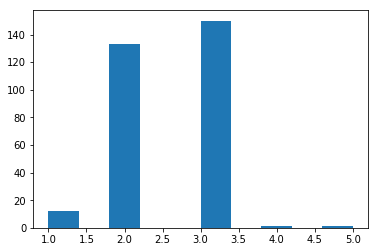

In [35]:
plt.hist(df['요일'])
#대부분 수, 목에 개봉했기 때문에 수,목에 개봉한 영화를 1, 다른 요일에 개봉한 영화를 0으로 변수 재설정

In [36]:
df['요일'] = np.where((df['요일'] == 2) | (df['요일'] == 3) , 1, 0)
df.head()

,영화명,관객 평점,전문가 평점,동영상,장르,등급,상영 시간,제작 국가,개봉일,관객수,개봉계절_봄,개봉계절_여름,개봉계절_가을,개봉계절_겨울,요일
0,택시운전사,9.04,6.09,20,드라마,15,137.0,한국,2017-08-02,"12,186,327",0,1,0,0,1
1,신과함께-죄와 벌,7.83,5.92,17,판타지,12,139.0,한국,2017-12-20,"8,539,495",0,0,0,1,1
2,공조,8.27,5.00,17,액션,15,125.0,한국,2017-01-18,"7,817,446",0,0,0,1,1
3,스파이더맨: 홈 커밍,8.37,7.00,8,액션,12,133.0,미국,2017-07-05,"7,258,678",0,1,0,0,1
4,범죄도시,9.14,6.00,14,액션,18,121.0,한국,2017-10-03,"6,879,841",0,0,1,0,0


In [37]:
#관객수가 200만 이상이면 흥행으로 판단(상위 36위까지)
df['관객수'] = df['관객수'].apply(lambda x: x.replace(',',''))
df['관객수'] = df['관객수'].astype(float)


In [38]:
df['제작 국가'] = np.where(df['제작 국가']== '한국', 1, 0)
df.head()

,영화명,관객 평점,전문가 평점,동영상,장르,등급,상영 시간,제작 국가,개봉일,관객수,개봉계절_봄,개봉계절_여름,개봉계절_가을,개봉계절_겨울,요일
0,택시운전사,9.04,6.09,20,드라마,15,137.0,1,2017-08-02,12186327.0,0,1,0,0,1
1,신과함께-죄와 벌,7.83,5.92,17,판타지,12,139.0,1,2017-12-20,8539495.0,0,0,0,1,1
2,공조,8.27,5.00,17,액션,15,125.0,1,2017-01-18,7817446.0,0,0,0,1,1
3,스파이더맨: 홈 커밍,8.37,7.00,8,액션,12,133.0,0,2017-07-05,7258678.0,0,1,0,0,1
4,범죄도시,9.14,6.00,14,액션,18,121.0,1,2017-10-03,6879841.0,0,0,1,0,0


In [39]:
df_genre_one_hot = pd.get_dummies(df.장르, prefix = '장르') 

In [40]:
df_final = pd.concat([df, df_genre_one_hot], axis = 1)
df_final.drop(['장르', '영화명', '개봉일'], axis = 1, inplace = True)
df_final.head()

,관객 평점,전문가 평점,동영상,등급,상영 시간,제작 국가,관객수,개봉계절_봄,개봉계절_여름,개봉계절_가을,...,장르_뮤지컬,장르_미스터리,장르_범죄,장르_블랙코미디,장르_서스펜스,장르_스릴러,장르_애니메이션,장르_액션,장르_코미디,장르_판타지
0,9.04,6.09,20,15,137.0,1,12186327.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,7.83,5.92,17,12,139.0,1,8539495.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,8.27,5.00,17,15,125.0,1,7817446.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,8.37,7.00,8,12,133.0,0,7258678.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,9.14,6.00,14,18,121.0,1,6879841.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 299
Data columns (total 29 columns):
관객 평점        297 non-null object
전문가 평점       297 non-null object
동영상          297 non-null object
등급           297 non-null int64
상영 시간        297 non-null float64
제작 국가        297 non-null int32
관객수          297 non-null float64
개봉계절_봄       297 non-null int32
개봉계절_여름      297 non-null int32
개봉계절_가을      297 non-null int32
개봉계절_겨울      297 non-null int32
요일           297 non-null int32
장르_SF        297 non-null uint8
장르_공포        297 non-null uint8
장르_느와르       297 non-null uint8
장르_다큐멘터리     297 non-null uint8
장르_드라마       297 non-null uint8
장르_멜로/로맨스    297 non-null uint8
장르_모험        297 non-null uint8
장르_뮤지컬       297 non-null uint8
장르_미스터리      297 non-null uint8
장르_범죄        297 non-null uint8
장르_블랙코미디     297 non-null uint8
장르_서스펜스      297 non-null uint8
장르_스릴러       297 non-null uint8
장르_애니메이션     297 non-null uint8
장르_액션        297 non-null uint8
장르_코미디       297 non-nul

In [42]:
df_final.to_csv('data_pre_processed.csv', encoding='utf-8')

## 코드 짜는 과정(아래로 보실 필요 없습니다.)

In [43]:
r.text

'{\n"lastBuildDate": "Thu, 18 Apr 2019 11:22:17 +0900",\n"total": 1,\n"start": 1,\n"display": 1,\n"items": [\n{\n"title": "<b>개구리왕국 2</b>",\n"link": "https://movie.naver.com/movie/bi/mi/basic.nhn?code=158751",\n"image": "https://ssl.pstatic.net/imgmovie/mdi/mit110/1587/158751_P01_093043.jpg",\n"subtitle": "Frog Kingdom : Sub-Zero Mission",\n"pubDate": "2015",\n"director": "상광희|펭 페이|",\n"actor": "사문영|이경태|임주현|홍진욱|윤세웅|이현|",\n"userRating": "7.00"\n\n}\n]\n}\n'

In [44]:
movie_info = json.loads(r.text)
movie_info

{'lastBuildDate': 'Thu, 18 Apr 2019 11:22:17 +0900',
 'total': 1,
 'start': 1,
 'display': 1,
 'items': [{'title': '<b>개구리왕국 2</b>',
   'link': 'https://movie.naver.com/movie/bi/mi/basic.nhn?code=158751',
   'image': 'https://ssl.pstatic.net/imgmovie/mdi/mit110/1587/158751_P01_093043.jpg',
   'subtitle': 'Frog Kingdom : Sub-Zero Mission',
   'pubDate': '2015',
   'director': '상광희|펭 페이|',
   'actor': '사문영|이경태|임주현|홍진욱|윤세웅|이현|',
   'userRating': '7.00'}]}

In [45]:
len(movie_info['items'])

1

In [46]:
user_rating = movie_info['items'][0]['userRating']

In [47]:
url = movie_info['items'][0]['link']

In [48]:
genre = soup.find_all('dd')[2].find('span').find_all('a')
genre_list = [genre.text.strip() for genre in genre]
genre_list

['애니메이션']

In [49]:
DG = soup.find_all('dd')[5].find('a').text
DG

'전체 관람가'

In [50]:
RT = soup.find_all('dd')[2].find_all('span')[2].text


In [51]:
        params = {'query': '택시운전사'
, 'yearfrom':2000, 'yearto':2018, 'display': 100}
        r = requests.get(NAVER_URL, headers={
                'X-Naver-Client-Id': NAVER_CLIENT_ID,
                'X-Naver-Client-Secret': NAVER_CLIENT_SECRET
            }, params=params)
        r.text

'{\n"lastBuildDate": "Thu, 18 Apr 2019 11:22:19 +0900",\n"total": 3,\n"start": 1,\n"display": 3,\n"items": [\n{\n"title": "<b>택시운전사</b>",\n"link": "https://movie.naver.com/movie/bi/mi/basic.nhn?code=146469",\n"image": "https://ssl.pstatic.net/imgmovie/mdi/mit110/1464/146469_P46_100138.jpg",\n"subtitle": "A Taxi Driver",\n"pubDate": "2017",\n"director": "장훈|",\n"actor": "송강호|토마스 크레취만|유해진|류준열|",\n"userRating": "9.04"\n\n},\n{\n"title": "<b>택시 운전사</b>의 사랑",\n"link": "https://movie.naver.com/movie/bi/mi/basic.nhn?code=44072",\n"image": "https://ssl.pstatic.net/imgmovie/mdi/mit110/0440/44072_P06_160944.jpg",\n"subtitle": "Midnight My Love",\n"pubDate": "2005",\n"director": "콩데이 자투라나사미|",\n"actor": "페치타이 웡캄라오|우라눗 웡사완|",\n"userRating": "8.56"\n\n},\n{\n"title": "<b>택시 운전사</b>의 사랑",\n"link": "https://movie.naver.com/movie/bi/mi/basic.nhn?code=33506",\n"image": "",\n"subtitle": "The Cabbie",\n"pubDate": "2000",\n"director": "이웬 첸|",\n"actor": "미야자와 리에|대립인|",\n"userRating": "5.50"\n\n}\n]\n}\n'

In [52]:
movie_info = json.loads(r.text)
url = movie_info['items'][0]['link']
source_code = requests.get(url)
plain_text = source_code.text
soup = BeautifulSoup(plain_text, 'lxml')


In [53]:
star_score = soup.find('div', {'class': 'main_score'})
star_score.find('span', {'class': 'spc_score'}).find_all('div', {'class': 'star_score'})

[]

In [54]:
soup.find_all('dd')[5].find('a').text

'15세 관람가'

In [55]:
str(movies['개봉일'][7])

'2017-01-18'

In [56]:
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="no" http-equiv="imagetoolbar"/>
<title>택시운전사 : 네이버 영화</title>
<meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" property="me2:image"/>
<meta content="네이버영화 택시운전사" property="me2:post_tag"/>
<meta content="네이버영화" property="me2:category1"/>
<meta content="택시운전사" property="me2:category2"/>
<meta content="택시운전사" property="og:title"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/bi/mi/basic.nhn?code=146469" property="og:url"/>
<meta content="https://movie-phinf.pstatic.net/20170717_298/1500253295782rcIkE_JPEG/movie_image.jpg?type=m665_443_2" property="og:image"/>
<meta content="택시운전사 만섭(송강호)은 외국손님을 태우고 광주에 갔다 통금 전에 돌아오면 밀린 월세를 갚을 수 있..." property="og:description"/>
<meta content="https://ssl.pstatic.net/imgmovie/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>


In [57]:
soup.find_all('span', {"class": "pg_cnt"})

[<span class="pg_cnt"><strong id="mainPhotoViewIndex">1</strong> / <em>107</em>건</span>,
 <span class="pg_cnt"><em>20</em>건</span>]

In [58]:
soup.find_all('dd')[2].find_all('span')[3].find_all('a')[3].text.strip() + soup.find_all('dd')[2].find_all('span')[3].find_all('a')[1].text.strip().replace('.','-')


IndexError: list index out of range